In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Data cleaning

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
data=data.drop("veil-type",axis=1)

# Preprocesing

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [8]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
data_1=pd.get_dummies(data,drop_first=True)

In [10]:
data_1.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
data_1.shape

(8124, 96)

In [12]:
y=data_1["class_p"]

In [13]:
x=data_1.drop("class_p",axis=1)

In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p, dtype: uint8

In [15]:
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split( x_train, y_train, test_size=0.2, random_state=0)

nie potrzebujemy skalować danych ponieważ mamy wartości 0-1, można by ewentualnie pomyśleć o normalizacji ale no nie wiem czu jest to mi potrzebne

In [18]:
for i in range(1,12):
    pca = PCA(n_components=i*5)
    pca.fit(x_train)
    print(i*5, pca.explained_variance_ratio_.sum())

5 0.47820012855418587
10 0.636934289600336
15 0.7359235570840463
20 0.8103499134793116
25 0.8648864911511599
30 0.9082319129060374
35 0.9398750470702224
40 0.9623612572566741
45 0.9776021387628387
50 0.9858250188993419
55 0.991139790558639


dwa podejścia z (patrz w górę) i bez

In [19]:
pca = PCA(n_components=40)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
x_train_pca=pca.transform(x_train)
x_valid_pca=pca.transform(x_valid)
x_test_pca=pca.transform(x_test)

# Model training and validation

### Random Forest

In [50]:
Best_model=None
Best_score=0
for n in range(3,20):
    for c in ["gini","entropy"]:
        for mf in ["auto",None]:
            clf = RandomForestClassifier(max_depth=n, criterion=c, max_features=mf)
            clf.fit(x_train_pca, y_train)
            y_pred=clf.predict(x_valid_pca)
            score=accuracy_score(y_valid,y_pred)
            print(n, c, mf, score)
            if score>Best_score:
                Best_model=clf
                Best_score= score
            

3 gini auto 0.9323076923076923
3 gini None 0.9761538461538461
3 entropy auto 0.9446153846153846
3 entropy None 0.9846153846153847
4 gini auto 0.9761538461538461
4 gini None 0.9853846153846154
4 entropy auto 0.9738461538461538
4 entropy None 0.9876923076923076
5 gini auto 0.9853846153846154
5 gini None 0.9892307692307692
5 entropy auto 0.9853846153846154
5 entropy None 0.9953846153846154
6 gini auto 0.9961538461538462
6 gini None 0.99
6 entropy auto 0.9923076923076923
6 entropy None 0.9961538461538462
7 gini auto 0.9923076923076923
7 gini None 0.9915384615384616
7 entropy auto 0.9961538461538462
7 entropy None 0.9992307692307693
8 gini auto 0.9953846153846154
8 gini None 0.9938461538461538
8 entropy auto 0.9992307692307693
8 entropy None 0.9992307692307693
9 gini auto 1.0
9 gini None 0.9938461538461538
9 entropy auto 0.9976923076923077
9 entropy None 0.9984615384615385
10 gini auto 1.0
10 gini None 0.9961538461538462
10 entropy auto 0.9992307692307693
10 entropy None 0.9969230769230769


In [51]:
print(Best_score)

1.0


In [52]:
y_pred=Best_model.predict(x_test_pca)

In [53]:
accuracy_score(y_test,y_pred)

0.9993846153846154

In [54]:
y_score=Best_model.predict_proba(x_test_pca)

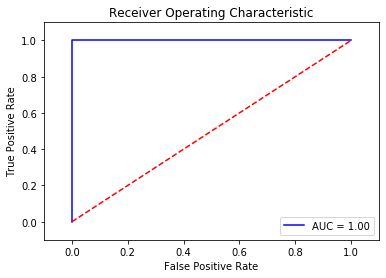

In [55]:
import sklearn.metrics as metrics
preds = y_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression

In [42]:
Best_model_reg=None
Best_score_reg=0
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    clf = LogisticRegression(C=c)
    clf.fit(x_train_pca, y_train)
    y_pred=clf.predict(x_valid_pca)
    score=accuracy_score(y_valid,y_pred)
    print(c, score)
    if score>Best_score_reg:
        Best_model_reg=clf
        Best_score_reg= score

0.001 0.9338461538461539
0.01 0.9823076923076923
0.1 0.9861538461538462
1 0.9923076923076923
10 0.9946153846153846
100 0.9969230769230769
1000 0.9992307692307693


In [43]:
print(Best_score_reg)

0.9992307692307693


In [46]:
y_pred=Best_model_reg.predict(x_test_pca)

In [47]:
accuracy_score(y_test,y_pred)

1.0

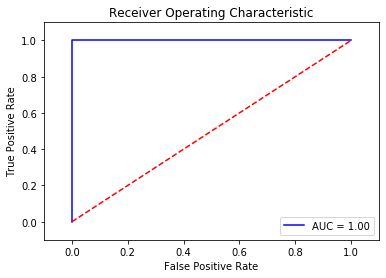

In [49]:
y_score=Best_model_reg.predict_proba(x_test_pca)
preds = y_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [60]:
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100]},
              {'kernel': ['linear'], 'C': [1, 10, 100]}]

grid=GridSearchCV(svc,param_grid,cv=10,scoring='accuracy')

In [65]:
grid.fit(x_train_pca,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [66]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'kernel': 'linear'}
0.9986535872283131


In [67]:
y_pred=grid.predict(x_test_pca)

In [68]:
accuracy_score(y_test,y_pred)

0.9987692307692307

In [78]:
y_score=grid.predict_proba(x_test_pca)
preds = y_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AttributeError: predict_proba is not available when  probability=False

### XGBoost

# Testing and analysing relusts